In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def calculate_ss(m, o, e):
    m_minus_o = np.subtract(float(m), o)
    m_minus_o_squared = np.power(m_minus_o, 2)
    e_squared = np.power(e, 2)
    o_squared = np.power(o, 2)
    
    sum_m_minus_o_squared = np.sum(m_minus_o_squared)
    sum_e_squared = np.sum(e_squared)
    sum_o_squared = np.sum(o_squared)
    
    numerator = (sum_m_minus_o_squared - sum_e_squared)
    print(numerator)
    denominator = (sum_o_squared - sum_e_squared)
    print(denominator)
    
    print(np.sqrt(numerator/denominator))
    return 1 - np.sqrt(numerator/denominator)

In [3]:
def calculate_rmse(m, o):
    m_minus_o = np.subtract(float(m), o)
    print(m_minus_o)
    m_minus_o_squared = np.power(m_minus_o, 2)
    print(m_minus_o_squared)
    sum_m_minus_o_squared = np.sum(m_minus_o_squared)
    print(sum_m_minus_o_squared)
    n = len(o)
    return np.sqrt(sum_m_minus_o_squared/n)


In [5]:
# kunlun

o_e_data=pd.read_csv('lake_surprise_o_e.csv')

m_data = pd.read_csv('/Users/alexaterrazas/Desktop/PMIP3_AJA/lake_surprise_m.csv')

# m_data = pd.concat([m_data_pmip3, m_data_pmip4])
m_data

,Unnamed: 0,model,m
0,0,PMIP3: CCSM4,-7.915253
1,1,PMIP3: CNRM,-3.514618
2,2,PMIP3: COSMOS,-6.516022
3,3,PMIP3: FGOALS,-9.883362
4,4,PMIP3: GISS,-6.429260
5,5,PMIP3: IPSL,-6.766235
6,6,PMIP3: MIROC,-9.529877
7,7,PMIP3: MPI,-5.804169
8,8,PMIP3: MRI,-5.211090
9,9,PMIP3 Ensemble,-6.841098


In [6]:

o_e_data[['TF4_MAAT_anom', 'HS_MAAT_anom']]

,TF4_MAAT_anom,HS_MAAT_anom
0,-7.476415,-8.917384
1,-1.784339,-1.226344
2,-7.200812,-8.626936
3,3.277710,5.997896
4,-4.427804,-4.957400
5,-8.906338,-10.833766
6,-6.381584,-7.619566
7,-5.657606,-6.626504
8,-6.147170,-7.192216
9,-2.018125,-1.485256


In [7]:
def skill_of_model(model):
    skill_TF4 = calculate_ss(
        m_data[m_data['model']==model]['m'], 
        o_e_data['TF4_MAAT_anom'],
        o_e_data['MAAT AT model 4 error']

    )
    
    skill_HS = calculate_ss(
        m_data[m_data['model']==model]['m'], 
        o_e_data['HS_MAAT_anom'],
        o_e_data['MAAT HS error']
    )

    return skill_TF4, skill_HS



In [8]:
for model in m_data['model']:
    print(skill_of_model(model))
    

348.86374697888107
348.5942332328044
1.0003864976055858
473.7499909122498
517.2484339396078
0.9570288172913585
(-0.0003864976055858449, 0.04297118270864153)
116.71565860861395
348.5942332328044
0.5786346855578187
265.93552773998124
517.2484339396078
0.717032082989092
(0.4213653144421813, 0.28296791701090795)
212.0548134838407
348.5942332328044
0.779944982190434
344.6782052350195
517.2484339396078
0.8163141398285526
(0.22005501780956604, 0.1836858601714474)
640.7037804604829
348.5942332328044
1.355715446009322
754.7072239594264
517.2484339396078
1.2079241419307751
(-0.3557154460093219, -0.20792414193077513)
205.5056678754147
348.5942332328044
0.7678065328495965
338.6088134160382
517.2484339396078
0.8090950360784179
(0.23219346715040345, 0.19090496392158207)
232.2067974554522
348.5942332328044
0.8161638695421495
363.4466150526895
517.2484339396078
0.8382445182090758
(0.18383613045785052, 0.16175548179092425)
579.7262429237367
348.5942332328044
1.2895891811495894
695.6843076478424
517.248

In [32]:
# Initialize lists to store model names and skill scores
model_names = []
skill_scores_TF4 = []
skill_scores_HS = []

# Loop over the models and store the results in lists
for model in m_data['model']:
    skill_TF4, skill_HS = skill_of_model(model)
    model_names.append(model)
    skill_scores_TF4.append(skill_TF4)
    skill_scores_HS.append(skill_HS)

# Create a DataFrame using the collected data
results_df = pd.DataFrame({
    'Model': model_names,
    'Skill_TF4': skill_scores_TF4,
    'Skill_HS': skill_scores_HS
})

results_df.to_csv('surprise_ss_df.csv') 

348.86374697888107
348.5942332328044
1.0003864976055858
473.7499909122498
517.2484339396078
0.9570288172913585
116.71565860861395
348.5942332328044
0.5786346855578187
265.93552773998124
517.2484339396078
0.717032082989092
212.0548134838407
348.5942332328044
0.779944982190434
344.6782052350195
517.2484339396078
0.8163141398285526
640.7037804604829
348.5942332328044
1.355715446009322
754.7072239594264
517.2484339396078
1.2079241419307751
205.5056678754147
348.5942332328044
0.7678065328495965
338.6088134160382
517.2484339396078
0.8090950360784179
232.2067974554522
348.5942332328044
0.8161638695421495
363.4466150526895
517.2484339396078
0.8382445182090758
579.7262429237367
348.5942332328044
1.2895891811495894
695.6843076478424
517.2484339396078
1.1597289844856289
164.99555091651877
348.5942332328044
0.6879803238912479
301.55518497954597
517.2484339396078
0.7635435413058324
137.3971468197363
348.5942332328044
0.6278107646387182
277.236251563054
517.2484339396078
0.7321084455960076
238.60123

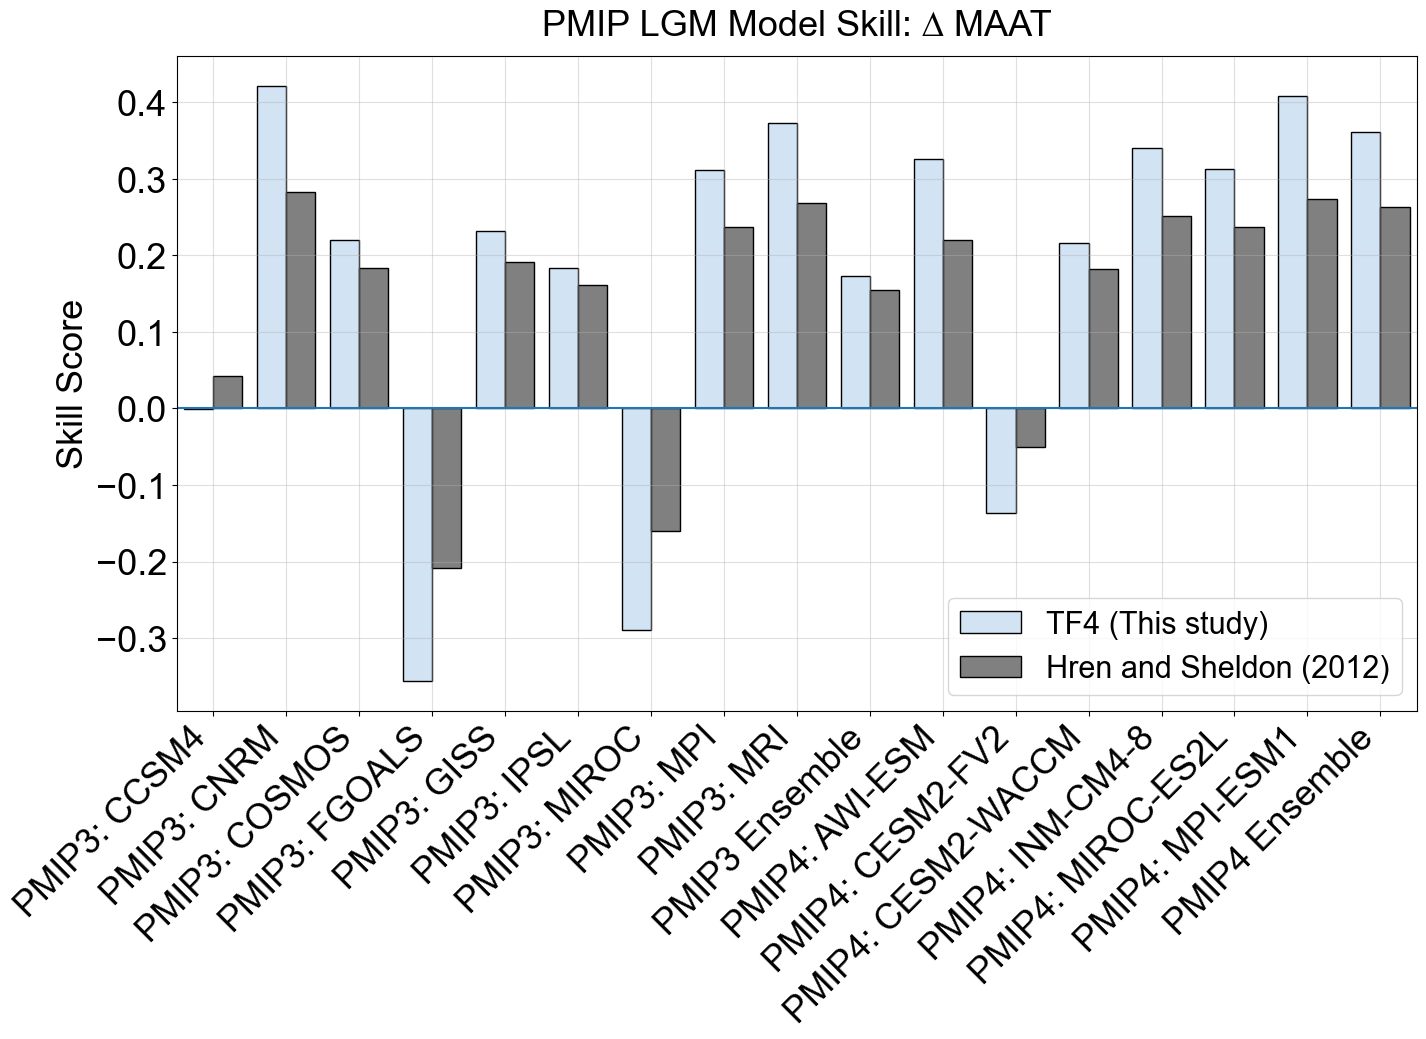

In [31]:
# Create the bar plot with a smaller figure size
fig, ax = plt.subplots(figsize=(16, 8.5))  # Reduce the width and height for a smaller plot

# Width of the bars
bar_width = 0.4

# Define the color for TF4 and HS bars
color_TF4 = '#d2e3f3'
color_HS = 'gray'

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 26  # Adjust the font size to fit the smaller figure
fs = 24

# Handle NaN values as 0 and plot "NA" where necessary
for i, (tf4, hs) in enumerate(zip(skill_scores_TF4, skill_scores_HS)):
    # Plot the TF4 bar
    if math.isnan(tf4):
        ax.bar(x[i] - bar_width/2, 0, bar_width, color=color_TF4)
        ax.text(x[i] - bar_width/2, 0, 'NA', ha='center', va='bottom', fontsize=fs)
    else:
        ax.bar(x[i] - bar_width/2, tf4, bar_width, color=color_TF4, edgecolor='k')
    
    # Plot the HS bar
    if math.isnan(hs):
        ax.bar(x[i] + bar_width/2, 0, bar_width, color=color_HS)
        ax.text(x[i] + bar_width/2, 0, 'NA', ha='center', va='bottom', color='gray', fontsize=fs)
    else:
        ax.bar(x[i] + bar_width/2, hs, bar_width, color=color_HS, edgecolor='k')

# Set x-axis limits to avoid clipping the last bar or text
ax.set_xlim(-0.5, len(models) - 0.5)

# Add labels, title, and axes ticks
ax.set_ylabel('Skill Score')
ax.set_title('PMIP LGM Model Skill: ∆ MAAT', fontsize=26, pad=15)  # Adjust the title size
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Adjust rotation and alignment for better readability

# Add a legend
ax.legend(['TF4 (This study)', 'Hren and Sheldon (2012)'], fontsize=22, loc='lower right')
ax.axhline(0)

# Optional: add grid for readability
ax.grid(True, alpha=0.4)

# Save and show the plot
plt.savefig('ss_surprise.png', dpi=300, bbox_inches='tight')
plt.show()
